# Classifying Mnist

This exercise is essentially the helloworld of machine learning with tensorflow, an mnist classifier. I followed along with the "TensorFlow for Deep Learning" lesson on udacity. 

## Install and import dependencies

We'll need tenslorflow and tensorflow_datasets.

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in c:\users\tim\anaconda3\lib\site-packages (1.3.2)


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
import tensorflow as tf

In [4]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [7]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [8]:
# explore the data

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Preprocess the data

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [10]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

### Explore the processed data

Let's plot an image to see what it looks like.

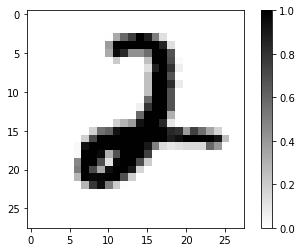

In [11]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - the number 2
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

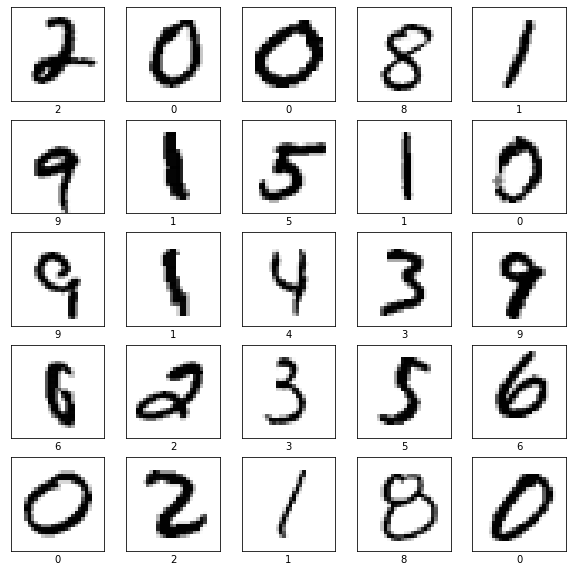

In [12]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers
These are the specifications recommended by the udacity tutorial for fashion_mnist, and it worked great for the standard mnist too.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [15]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - ETA: 2:40:55 - loss: 2.4062 - accuracy: 0.062 - ETA: 12:25 - loss: 1.9318 - accuracy: 0.3918  - ETA: 5:12 - loss: 1.4297 - accuracy: 0.605 - ETA: 3:26 - loss: 1.1877 - accuracy: 0.68 - ETA: 2:18 - loss: 1.0043 - accuracy: 0.72 - ETA: 1:47 - loss: 0.8921 - accuracy: 0.75 - ETA: 1:28 - loss: 0.8291 - accuracy: 0.77 - ETA: 1:15 - loss: 0.7649 - accuracy: 0.79 - ETA: 1:04 - loss: 0.7160 - accuracy: 0.80 - ETA: 57s - loss: 0.6718 - accuracy: 0.8170 - ETA: 50s - loss: 0.6372 - accuracy: 0.825 - ETA: 45s - loss: 0.6117 - accuracy: 0.832 - ETA: 41s - loss: 0.5897 - accuracy: 0.838 - ETA: 37s - loss: 0.5688 - accuracy: 0.843 - ETA: 34s - loss: 0.5545 - accuracy: 0.847 - ETA: 32s - loss: 0.5362 - accuracy: 0.852 - ETA: 29s - loss: 0.5220 - accuracy: 0.856 - ETA: 27s - loss: 0.5100 - accuracy: 0.858 - ETA: 25s - loss: 0.4979 - accuracy: 0.861 - ETA: 24s - loss: 0.4907 - accuracy: 0.863 - ETA: 22s - loss: 0.4795 - accuracy

## Evaluate accuracy

Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - ETA: 56s - loss: 0.1315 - accuracy: 0.968 - ETA: 5s - loss: 0.0713 - accuracy: 0.973 - ETA: 3s - loss: 0.0785 - accuracy: 0.97 - ETA: 2s - loss: 0.0775 - accuracy: 0.97 - ETA: 1s - loss: 0.0739 - accuracy: 0.97 - ETA: 1s - loss: 0.0726 - accuracy: 0.97 - ETA: 1s - loss: 0.0739 - accuracy: 0.97 - ETA: 1s - loss: 0.0828 - accuracy: 0.97 - ETA: 1s - loss: 0.0800 - accuracy: 0.97 - ETA: 1s - loss: 0.0786 - accuracy: 0.97 - ETA: 0s - loss: 0.0778 - accuracy: 0.97 - ETA: 0s - loss: 0.0792 - accuracy: 0.97 - ETA: 0s - loss: 0.0785 - accuracy: 0.97 - ETA: 0s - loss: 0.0758 - accuracy: 0.97 - ETA: 0s - loss: 0.0757 - accuracy: 0.97 - ETA: 0s - loss: 0.0762 - accuracy: 0.97 - ETA: 0s - loss: 0.0756 - accuracy: 0.97 - ETA: 0s - loss: 0.0748 - accuracy: 0.97 - ETA: 0s - loss: 0.0737 - accuracy: 0.97 - ETA: 0s - loss: 0.0726 - accuracy: 0.97 - ETA: 0s - loss: 0.0737 - accuracy: 0.97 - ETA: 0s - loss: 0.0724 - accuracy: 0.97 - ETA: 0s - loss: 0.0727 - accur

## Make predictions and explore

With the model trained, we can use it to make predictions about some images.

In [18]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [19]:
predictions.shape


(32, 10)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([1.8563928e-10, 2.9982157e-09, 9.9999952e-01, 5.1556964e-07,
       1.2082441e-08, 1.6351937e-12, 2.7139322e-09, 2.8512319e-09,
       3.9141717e-09, 6.3721187e-15], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different numbers. We can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

2

In [22]:
test_labels[0]

2

We can graph this to look at the full set of 10 class predictions

In [23]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

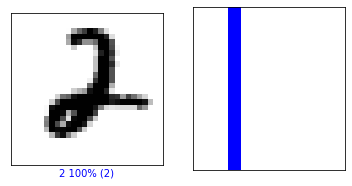

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

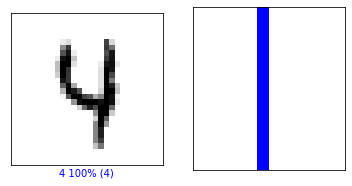

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

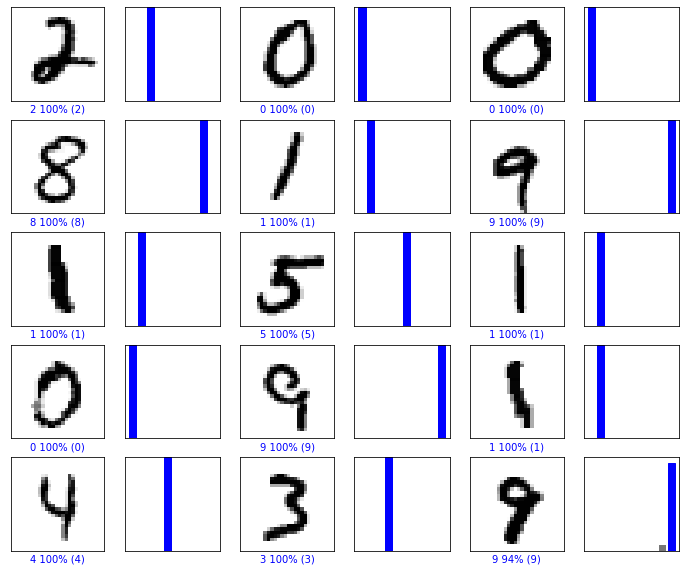

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)



# Prediction about a single image

In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


Now predict the image:

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.8563928e-10 2.9982099e-09 9.9999952e-01 5.1556964e-07 1.2082418e-08
  1.6351937e-12 2.7139375e-09 2.8512319e-09 3.9141717e-09 6.3721187e-15]]


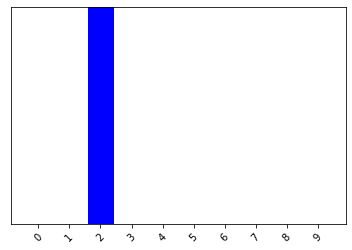

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2